# Home 3: Build a CNN for image recognition.

### Name: Amir Morcos


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2019F/blob/master/homework/HM3/HM3.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    RetArray = numpy.zeros((len(y),num_class))
    for i in range (len(y)):
         RetArray[i,y[i]] = 1 #there should be a better way to do this though list comprehension, I just cant think of it 
    
    return RetArray

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.models import Sequential
from keras import initializers
from keras import optimizers

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((3, 3)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [5]:
import random

def ShakeItUp(Model):
    Weights = Model.get_weights()
    for i in range(numpy.size(Weights)):
        Weights[i]+=random.random()
        
    print("Randomizing Model Weights")
    Model.set_weights(Weights)
    


In [6]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, BatchNormalization, Flatten, Dense, Dropout
def GetInceptionMod(x_input):
    #Based on this site https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/
    tower1 = Conv2D(64, (1,1), padding='same', activation='relu')(x_input)
    tower2 = Conv2D(64, (1,1), padding='same', activation='relu')(x_input)
    tower2 = Conv2D(64, (3,3), padding='same', activation='relu')(tower2)
    tower3 = Conv2D(64, (1,1), padding='same', activation='relu')(x_input)
    tower3 = Conv2D(64, (5,5), padding='same', activation='relu')(tower3)
    tower4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(x_input)
    tower4 = Conv2D(64, (1,1), padding='same', activation='relu')(tower4)
    x_output = concatenate([tower1, tower2, tower3, tower4],axis = 3)
    
    return x_output

In [7]:
ImageIn = Input(shape=(32,32,3))
P1 = GetInceptionMod(ImageIn) 
P11 = BatchNormalization()(P1)
P2 = GetInceptionMod(P11) 
P22 = BatchNormalization()(P2)
#P3 = GetInceptionMod(P2) 
Pool = MaxPooling2D((3,3))(P22)
Flattened = Flatten()(Pool)
DO1 = Dropout(0.5)(Flattened)
#Den1 = Dense(128, activation='relu')(DO1)
#DO2 = Dropout(0.5)(Den1)
#Den2 = Dense(128, activation='relu')(DO2)
Out = Dense(10, activation='softmax')(DO1)




In [8]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.models import Sequential
from keras import initializers
from keras import optimizers

IncepModel = Model(ImageIn,Out)
IncepModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 32, 32, 3)    0           input_1[0][0]                    
____________________________________________________________________________________________

In [9]:
IncepModel.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=learning_rate),
                   optimizer=optimizers.adam(learning_rate=.0005),   
                  metrics=['acc'])
history = IncepModel.fit(x_tr, y_tr, batch_size=16, epochs=50, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 60s 2ms/step - loss: 1.9293 - acc: 0.4753 - val_loss: 1.6537 - val_acc: 0.4722
Epoch 2/50
40000/40000 [==============================] - 57s 1ms/step - loss: 1.0946 - acc: 0.6206 - val_loss: 1.0527 - val_acc: 0.6312
Epoch 3/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.9356 - acc: 0.6719 - val_loss: 1.1165 - val_acc: 0.6303
Epoch 4/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.8403 - acc: 0.7086 - val_loss: 0.9039 - val_acc: 0.6934
Epoch 5/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.7651 - acc: 0.7327 - val_loss: 0.8500 - val_acc: 0.7145
Epoch 6/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.6968 - acc: 0.7575 - val_loss: 0.8376 - val_acc: 0.7174
Epoch 7/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.6369 - acc: 0.7762 - val_loss: 0.9111 - val_acc

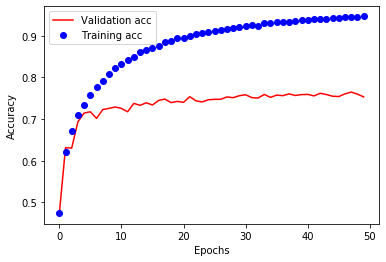

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


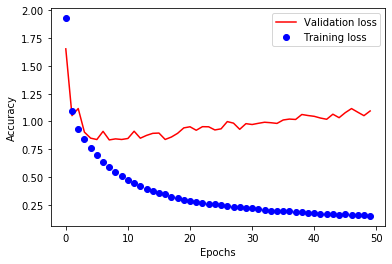

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
print(IncepModel.predict((x_train[0].reshape((1,32,32,3)))))
IncepModel.save(IncepModel.name+'.h5') 

[[1.7449786e-10 2.5226867e-09 1.7786251e-06 3.5958801e-04 3.1997763e-06
  2.7029935e-04 9.9936503e-01 7.3533002e-08 3.5918557e-08 9.9558096e-12]]


In [13]:
BatchSize = 32
learning_rate = .0005

model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.adam(learning_rate=learning_rate),   
                  metrics=['acc'])

history = model.fit(x_tr, y_tr, batch_size=BatchSize, epochs=50, validation_data=(x_val, y_val))
loss_and_acc = model.evaluate(x_tr, y_tr)

print('learning_rate = ' + str(learning_rate))
print('accuracy = ' + str(loss_and_acc[1]))
print('Batch Size = ' + str(BatchSize))
        
        

model.save(model.name+'.h5') 

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 21s 516us/step - loss: 1.6892 - acc: 0.3734 - val_loss: 1.4366 - val_acc: 0.4755
Epoch 2/50
40000/40000 [==============================] - 19s 473us/step - loss: 1.2159 - acc: 0.5632 - val_loss: 1.1110 - val_acc: 0.6056
Epoch 3/50
40000/40000 [==============================] - 19s 474us/step - loss: 1.0135 - acc: 0.6409 - val_loss: 1.0551 - val_acc: 0.6286
Epoch 4/50
40000/40000 [==============================] - 19s 475us/step - loss: 0.8764 - acc: 0.6950 - val_loss: 1.0357 - val_acc: 0.6487
Epoch 5/50
40000/40000 [==============================] - 19s 472us/step - loss: 0.7859 - acc: 0.7280 - val_loss: 0.7467 - val_acc: 0.7400
Epoch 6/50
40000/40000 [==============================] - 19s 473us/step - loss: 0.7192 - acc: 0.7505 - val_loss: 0.8261 - val_acc: 0.7102
Epoch 7/50
40000/40000 [==============================] - 19s 473us/step - loss: 0.6620 - acc: 0.7713 - val_loss: 0.

In [14]:
print(model.predict((x_train[0].reshape((1,32,32,3)))))

[[1.0978503e-11 1.1085327e-08 2.3934160e-07 8.2122341e-07 4.3157169e-08
  2.0769285e-07 9.9999869e-01 1.6583164e-11 5.5989408e-10 2.5125922e-11]]


In [15]:
print(model.get_weights())

[array([[[[-1.19118221e-01,  2.75980711e-01,  9.42434147e-02,
           1.79269180e-01, -1.29711315e-01, -6.34069741e-02,
           1.15398400e-01,  2.23336264e-01, -3.13932262e-02,
          -1.04863606e-01,  7.66658187e-02, -6.61144555e-02,
          -1.60535157e-01, -5.26836561e-03, -4.98830229e-02,
          -3.13609615e-02, -2.65347153e-01,  2.27301821e-01,
           2.12701097e-01,  1.34229064e-01,  1.84526891e-02,
          -1.14678316e-01,  1.54401418e-02,  1.29564330e-01,
           9.54378396e-02, -1.46688670e-01,  1.33856982e-01,
           1.86067790e-01,  2.16496363e-01,  1.02891073e-01,
           1.53658479e-01, -1.16254352e-01],
         [-6.09125756e-02,  7.22201355e-03, -1.14747451e-03,
          -1.13198541e-01, -1.83968604e-01,  8.66930932e-02,
           2.69995421e-01,  7.39621967e-02, -9.84292701e-02,
          -5.94001152e-02, -4.58185039e-02, -1.86145812e-01,
           7.31822252e-02,  6.45251498e-02, -7.05438666e-04,
          -2.55532026e-01, -2.10599259e

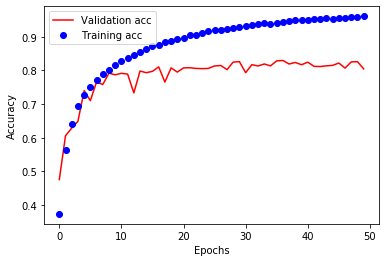

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


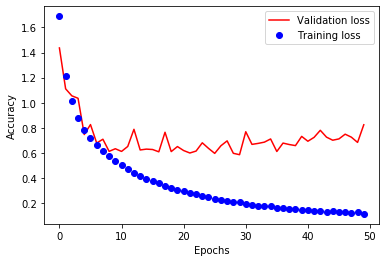

In [17]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [18]:
ImageIn = Input(shape=(32,32,3))
P1 = GetInceptionMod(ImageIn) 
P11 = BatchNormalization()(P1)
P2 = GetInceptionMod(P11) 
P22 = BatchNormalization()(P2)
#P3 = GetInceptionMod(P2) 
Pool = MaxPooling2D((3,3))(P22)
Flattened = Flatten()(Pool)
DO1 = Dropout(0.5)(Flattened)
#Den1 = Dense(128, activation='relu')(DO1)
#DO2 = Dropout(0.5)(Den1)
#Den2 = Dense(128, activation='relu')(DO2)
Out = Dense(10, activation='softmax')(DO1)

IncepModelFull = Model(ImageIn,Out)
IncepModelFull.summary()

IncepModelFull.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.adam(learning_rate=.0005),   
                   metrics=['acc'])


IncepModelFull.fit(x_train, y_train_vec, batch_size=16, epochs=50)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 32, 64)   256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 64)   256         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 32, 32, 3)    0           input_2[0][0]                    
____________________________________________________________________________________________

50000/50000 [==============================] - 66s 1ms/step - loss: 0.2523 - acc: 0.9081
Epoch 27/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2413 - acc: 0.9130
Epoch 28/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2318 - acc: 0.9174: 1s - loss:
Epoch 29/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2318 - acc: 0.9167
Epoch 30/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2236 - acc: 0.9197
Epoch 31/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2223 - acc: 0.9217
Epoch 32/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2118 - acc: 0.9251
Epoch 33/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2116 - acc: 0.9243
Epoch 34/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2071 - acc: 0.9270
Epoch 35/50
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2019 - ac

In [19]:
IncepModelFull.save(IncepModelFull.name+'_2.h5') 

In [20]:
model50K = Sequential()
model50K.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model50K.add(Activation('relu'))

model50K.add(Conv2D(32, (3, 3), padding='same'))
model50K.add(BatchNormalization())
model50K.add(Activation('relu'))

model50K.add(MaxPooling2D((2, 2)))

model50K.add(Conv2D(64, (3, 3), padding='same'))
model50K.add(Activation('relu'))

model50K.add(Conv2D(64, (3, 3), padding='same'))
model50K.add(BatchNormalization())
model50K.add(Activation('relu'))

model50K.add(MaxPooling2D((2, 2)))

model50K.add(Conv2D(128, (3, 3), padding='same'))
model50K.add(Activation('relu'))

model50K.add(Conv2D(128, (3, 3), padding='same'))
model50K.add(BatchNormalization())
model50K.add(Activation('relu'))

model50K.add(MaxPooling2D((3, 3)))

model50K.add(Flatten())

model50K.add(Dropout(0.5))
model50K.add(Dense(512, activation='relu'))

model50K.add(Dropout(0.5))
model50K.add(Dense(256, activation='relu'))

model50K.add(Dense(10, activation='softmax'))

model50K.summary()

learning_rate = .0005

model50K.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(learning_rate=learning_rate),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)       

In [21]:
model50K.fit(x_train, y_train_vec, batch_size=32, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 23s 468us/step - loss: 1.5951 - acc: 0.4160
Epoch 2/50
50000/50000 [==============================] - 23s 451us/step - loss: 1.1010 - acc: 0.6061
Epoch 3/50
50000/50000 [==============================] - 22s 439us/step - loss: 0.8955 - acc: 0.6871
Epoch 4/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.7816 - acc: 0.7305
Epoch 5/50
50000/50000 [==============================] - 22s 441us/step - loss: 0.7027 - acc: 0.7579
Epoch 6/50
50000/50000 [==============================] - 22s 440us/step - loss: 0.6512 - acc: 0.7758
Epoch 7/50
50000/50000 [==============================] - 22s 441us/step - loss: 0.5998 - acc: 0.7947
Epoch 8/50
50000/50000 [==============================] - 22s 440us/step - loss: 0.5587 - acc: 0.8080
Epoch 9/50
50000/50000 [==============================] - 22s 439us/step - loss: 0.5258 - acc: 0.8204
Epoch 10/50
50000/50000 [==============================] - 22s 438us/step - loss: 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [22]:
loss_and_acc = model50K.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 153us/step
loss = 0.6335758130550384
accuracy = 0.836899995803833


In [23]:
model50K.save(model50K.name+'_2.h5') 

In [24]:
loss_and_acc = IncepModelFull.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 3s 331us/step
loss = 0.9524759570598602
accuracy = 0.7764000296592712
